Observations:
1.  There is not a super strong correlation between latitude and humidity, but the greatest amount of occurances are around the equator as expected.
2.  The highest max temps occur in the cities with latitudes between -20 and 20.
3.  A majority of the cities in the dataset are in the northern hemisphere. As this is a random sampling of cities of the world, it can be inferred that the majority of world cities are in the northen hemisphere. 

In [1]:
import json
import requests as req
import pandas as pd
import matplotlib.pyplot as plt
from citipy import citipy
import random
import numpy

In [2]:
api_key = "c45e33fa47a9854838ab20e8f2190207"
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

In [3]:
query_url = url + "&units=" + units + "&appid=" + api_key + "&q="

In [4]:
lat_list = numpy.random.uniform(low=-90, high=90, size=2000)
lon_list = numpy.random.uniform(low=-180, high=180, size=2000)

In [5]:
rand_lat = random.sample(list(lat_list), 2000)
rand_lon = random.sample(list(lon_list), 2000)

In [6]:
zip_list = list( zip(rand_lat, rand_lon))
zip_list

[(-74.569653928374322, -41.704047742995385),
 (-57.852628320420436, 15.589928602863779),
 (33.547440871883609, 163.59135232459442),
 (80.493357997933316, 36.058601217456669),
 (48.130066036336871, -2.9395630012778611),
 (-27.628904653821557, -23.79972883688589),
 (-9.4175371524220282, -68.994362256390644),
 (4.6530948996738886, 67.696268125653773),
 (36.039783423116532, -77.525598629381548),
 (56.041462875810424, 156.46110437151196),
 (-21.412117873229519, 145.21682502639311),
 (64.562291841181633, -138.80524847090209),
 (-14.357232178389921, -57.299639250392701),
 (49.776933121103383, -154.96096086183957),
 (-67.789932162896434, -76.862004619148408),
 (39.032645794956636, 121.64527484022204),
 (-73.784383492484551, -49.442149460022648),
 (33.146626649742956, -123.32620405214061),
 (88.551812028684083, -173.32520835933229),
 (-71.985563322804182, -173.43128971646905),
 (41.738083858016211, 45.720341658356176),
 (84.50602183795138, 165.1684132065634),
 (-6.3114469521658094, -143.8207527

In [7]:
cities = []
for x in zip_list:
    city = citipy.nearest_city(x[0], x[1])
    print (city.city_name)
    cities.append(city.city_name)
    cities

ushuaia
hermanus
severo-kurilsk
vardo
pontivy
vila velha
sena madureira
mahibadhoo
tarboro
sobolevo
charters towers
mayo
nova olimpia
kodiak
ushuaia
dalianwan
ushuaia
lompoc
mys shmidta
vaini
gurjaani
pevek
atuona
kapaa
santa helena de goias
faanui
ushuaia
jamestown
bengkulu
samoylovka
diamantino
rikitea
ribeira grande
mataura
kapaa
alta floresta
kaitangata
cherskiy
amderma
east london
tabiauea
vila franca do campo
rikitea
namatanai
ribeira grande
hithadhoo
bredasdorp
nanortalik
tuktoyaktuk
ziro
rikitea
hilo
punta arenas
puerto ayora
belushya guba
albany
kawalu
skopelos
saldanha
gat
hilo
santa marta
port alfred
buchanan
carmen
rikitea
kuytun
fort wellington
busselton
fukue
mariental
severo-kurilsk
tsihombe
illoqqortoormiut
mataura
alofi
husavik
mount gambier
san pedro
barrow
mataura
belushya guba
kirakira
meulaboh
illoqqortoormiut
norman wells
tocopilla
honiara
gardan diwal
jinxiang
mataura
grand river south east
loikaw
lorengau
busselton
puerto ayora
sitka
new norfolk
atuona
longyearb

In [47]:
cities_pd = pd.DataFrame(cities)
cities_pd.head()

0
0         ushuaia
1        hermanus
2  severo-kurilsk
3           vardo
4         pontivy

In [9]:
cities_pd['Lat'] = ""
cities_pd['Lng'] = ""
cities_pd['Country Code'] = ""
cities_pd['Date'] = ""
cities_pd['Humidity'] = ""
cities_pd['Cloudiness'] = ""
cities_pd['Wind Speed'] = ""
cities_pd['Max Temp'] = ""
cities_pd = cities_pd.rename(columns = {0 : "City Name"})
cities_pd.head()

City Name Lat Lng Country Code Date Humidity Cloudiness Wind Speed  \
0         ushuaia                                                            
1        hermanus                                                            
2  severo-kurilsk                                                            
3           vardo                                                            
4         pontivy                                                            

  Max Temp  
0           
1           
2           
3           
4

In [10]:
cities_pd.columns

Index(['City Name', 'Lat', 'Lng', 'Country Code', 'Date', 'Humidity',
       'Cloudiness', 'Wind Speed', 'Max Temp'],
      dtype='object')

In [11]:
weather_json = []
counter = 0
for index, row in cities_pd.iterrows():
    try:
        citi = row['City Name'].replace(' ', "+")
        weather_response = req.get(query_url + citi).json()
        weather_json.append(weather_response)
        print(f"Working on {counter}")
        print(query_url + citi)
        cities_pd.set_value(index, "Lat", weather_response['coord']['lat'])
        cities_pd.set_value(index, "Lng", weather_response['coord']['lon'])
        cities_pd.set_value(index, "Country Code", weather_response['sys']['country'])
        cities_pd.set_value(index, "Date", weather_response['dt'])
        cities_pd.set_value(index, "Humidity", weather_response['main']['humidity'])
        cities_pd.set_value(index, "Cloudiness", weather_response['clouds']['all'])
        cities_pd.set_value(index, "Wind Speed", weather_response['wind']['speed'])
        cities_pd.set_value(index, "Max Temp", weather_response['main']['temp_max'])
    except:
        print("city not found")
        continue
    counter = counter + 1

Working on 0
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=ushuaia
Working on 1
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=hermanus
Working on 2
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=severo-kurilsk
Working on 3
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=vardo
Working on 4
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=pontivy
Working on 5
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=vila+velha
Working on 6
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=sena+madureira
Working on 7
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f21

Working on 59
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=carmen
Working on 60
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=rikitea
Working on 61
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=kuytun
Working on 62
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=fort+wellington
Working on 63
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=busselton
Working on 64
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=fukue
Working on 65
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=mariental
Working on 66
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f21

Working on 116
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=shenjiamen
Working on 117
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=buala
Working on 118
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=sistranda
Working on 119
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=jamestown
Working on 120
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=bereda
Working on 121
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=chokurdakh
Working on 122
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=camacha
Working on 123
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab

Working on 173
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=upernavik
Working on 174
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=paamiut
Working on 175
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=taltal
Working on 176
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=altay
Working on 177
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=jamestown
Working on 178
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=jiwani
Working on 179
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=hasaki
Working on 180
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f219

Working on 234
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=sitka
Working on 235
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=saint-philippe
Working on 236
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=port+alfred
Working on 237
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=elesbao+veloso
Working on 238
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=victoria
Working on 239
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=torbay
Working on 240
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=ponta+do+sol
Working on 241
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33

Working on 296
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=broken+hill
Working on 297
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=naze
Working on 298
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=fukue
Working on 299
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=lebu
Working on 300
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=upernavik
Working on 301
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=tasiilaq
Working on 302
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=airai
Working on 303
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f21902

Working on 356
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=imeni+babushkina
Working on 357
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=albany
Working on 358
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=ushuaia
Working on 359
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=lagoa
Working on 360
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=bredasdorp
Working on 361
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=barrow
Working on 362
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=butaritari
Working on 363
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a98548

Working on 415
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=punta+arenas
Working on 416
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=hobart
Working on 417
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=nikolskoye
Working on 418
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=yellowknife
Working on 419
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=faranah
Working on 420
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=clyde+river
Working on 421
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=hilo
Working on 422
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854

Working on 469
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=tynaarlo
Working on 470
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=ushuaia
Working on 471
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=dingle
Working on 472
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=filadelfia
Working on 473
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=hauterive
Working on 474
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=rikitea
Working on 475
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=kapaa
Working on 476
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8

Working on 528
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=hithadhoo
Working on 529
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=airai
Working on 530
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=amga
Working on 531
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=attawapiskat
city not found
Working on 531
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=denpasar
Working on 532
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=belushya+guba
city not found
Working on 532
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=laguna
Working on 533
http://api.openweathermap.org/data/2.5/weather?&units=impe

Working on 585
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=carauari
Working on 586
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=napier
Working on 587
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=hohhot
Working on 588
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=thunder+bay
Working on 589
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=saint-philippe
Working on 590
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=kupang
Working on 591
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=sabancuy
Working on 592
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a985483

Working on 643
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=khatanga
Working on 644
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=olafsvik
city not found
Working on 644
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=dikson
Working on 645
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=itubera
Working on 646
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=bolungarvik
city not found
Working on 646
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=bethel
Working on 647
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=amderma
city not found
Working on 647
http://api.openweathermap.org/data/2.5/weather?

Working on 701
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=avarua
Working on 702
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=punta+arenas
Working on 703
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=grand+centre
city not found
Working on 703
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=kapaa
Working on 704
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=atuona
Working on 705
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=lorengau
Working on 706
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=saryg-sep
Working on 707
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45

Working on 761
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=portland
Working on 762
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=bluff
Working on 763
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=ushuaia
Working on 764
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=labuhan
Working on 765
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=airai
Working on 766
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=qasigiannguit
Working on 767
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=vaini
Working on 768
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2

Working on 819
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=tasiilaq
Working on 820
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=gurgan
city not found
Working on 820
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=lokosovo
Working on 821
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=mrirt
city not found
Working on 821
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=hermanus
Working on 822
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=illoqqortoormiut
city not found
Working on 822
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=bluff
Working on 823
http://api.openweathermap.org/data/2.5/weath

Working on 878
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=rikitea
Working on 879
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=rikitea
Working on 880
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=anchorage
Working on 881
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=barrow
Working on 882
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=mataura
Working on 883
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=viedma
Working on 884
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=taloqan
Working on 885
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f21

Working on 937
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=bimbo
Working on 938
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=new+norfolk
Working on 939
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=bogorodskoye
Working on 940
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=punta+arenas
Working on 941
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=lavrentiya
Working on 942
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=nikolskoye
Working on 943
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=bonthe
Working on 944
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47

Working on 997
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=cabo+san+lucas
Working on 998
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=rikitea
Working on 999
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=emba
Working on 1000
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=vila+franca+do+campo
Working on 1001
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=aklavik
Working on 1002
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=tsihombe
city not found
Working on 1002
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=faanui
Working on 1003
http://api.openweathermap.org/data/2.5/weather?&units=imper

Working on 1053
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=new+norfolk
Working on 1054
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=taolanaro
city not found
Working on 1054
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=constitucion
Working on 1055
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=goderich
Working on 1056
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=berlevag
Working on 1057
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=hermanus
Working on 1058
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=illoqqortoormiut
city not found
Working on 1058
http://api.openweathermap.org/data/

Working on 1110
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=dogondoutchi
Working on 1111
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=jumla
Working on 1112
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=victoria
Working on 1113
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=talnakh
Working on 1114
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=yellowknife
Working on 1115
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=tiksi
Working on 1116
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=victoria
Working on 1117
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9

Working on 1171
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=mao
Working on 1172
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=rikitea
Working on 1173
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=taolanaro
city not found
Working on 1173
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=alotau
city not found
Working on 1173
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=crotone
Working on 1174
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=debre+birhan
Working on 1175
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=busselton
Working on 1176
http://api.openweathermap.org/data/2.5/weather?&units=

Working on 1229
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=beyneu
Working on 1230
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=miri
Working on 1231
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=longyearbyen
Working on 1232
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=castro
Working on 1233
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=hithadhoo
Working on 1234
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=kiama
Working on 1235
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=atuona
Working on 1236
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab

Working on 1285
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=salur
Working on 1286
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=yulara
Working on 1287
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=north+bend
Working on 1288
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=new+norfolk
Working on 1289
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=souillac
Working on 1290
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=aguie
Working on 1291
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=khatanga
Working on 1292
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854

Working on 1344
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=goderich
Working on 1345
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=cap+malheureux
Working on 1346
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=yar-sale
Working on 1347
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=khatanga
Working on 1348
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=amderma
city not found
Working on 1348
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=parole
Working on 1349
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=hasaki
Working on 1350
http://api.openweathermap.org/data/2.5/weather?&units=imperial&ap

Working on 1398
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=okandja
city not found
Working on 1398
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=richards+bay
Working on 1399
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=ahuimanu
Working on 1400
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=coria
Working on 1401
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=olafsvik
city not found
Working on 1401
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=vaitupu
city not found
Working on 1401
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=casablanca
Working on 1402
http://api.openweathermap.org/data/

Working on 1449
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=hihifo
city not found
Working on 1449
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=mataura
Working on 1450
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=faanui
Working on 1451
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=ponta+do+sol
Working on 1452
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=santa+ines
Working on 1453
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=korla
city not found
Working on 1453
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=new+norfolk
Working on 1454
http://api.openweathermap.org/data/2.5/weather?&un

Working on 1506
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=tuktoyaktuk
Working on 1507
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=leh
Working on 1508
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=kachikau
city not found
Working on 1508
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=aflu
city not found
Working on 1508
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=oxford
Working on 1509
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=bardiyah
city not found
Working on 1509
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=pevek
Working on 1510
http://api.openweathermap.org/data/2.5/weather?

Working on 1560
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=ushuaia
Working on 1561
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=nikolskoye
Working on 1562
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=aswan
Working on 1563
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=cidreira
Working on 1564
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=ostrovnoy
Working on 1565
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=saint-augustin
Working on 1566
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=taolanaro
city not found
Working on 1566
http://api.openweathermap.org/data/2.5/weather?&units=imperi

Working on 1617
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=hualmay
Working on 1618
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=hasaki
Working on 1619
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=mataura
Working on 1620
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=ponta+do+sol
Working on 1621
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=butaritari
Working on 1622
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=carnarvon
Working on 1623
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=ahuimanu
Working on 1624
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa4

Working on 1672
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=mataura
Working on 1673
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=warrnambool
Working on 1674
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=bambous+virieux
Working on 1675
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=pisco
Working on 1676
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=atuona
Working on 1677
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=anadyr
Working on 1678
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=belushya+guba
city not found
Working on 1678
http://api.openweathermap.org/data/2.5/weather?&units=imper

Working on 1726
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=ushuaia
Working on 1727
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=buraydah
Working on 1728
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=ushuaia
Working on 1729
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=kahta
Working on 1730
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=almaznyy
Working on 1731
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=busselton
Working on 1732
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=acarau
city not found
Working on 1732
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45

Working on 1783
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=hambantota
Working on 1784
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=lompoc
Working on 1785
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=mar+del+plata
Working on 1786
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=kulhudhuffushi
Working on 1787
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=busselton
Working on 1788
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=nizhneyansk
city not found
Working on 1788
http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=c45e33fa47a9854838ab20e8f2190207&q=khandbari
Working on 1789
http://api.openweathermap.org/data/2.5/weather?&un

In [12]:
cities_pd.head()

City Name    Lat     Lng Country Code        Date Humidity Cloudiness  \
0         ushuaia -54.81  -68.31           AR  1517180400       70         40   
1        hermanus -34.42   19.24           ZA  1517184141       85          0   
2  severo-kurilsk  50.68  156.12           RU  1517184172      100          0   
3           vardo  39.62  -77.74           US  1517183400       93         90   
4         pontivy  48.06   -2.97           FR  1517184000      100         90   

  Wind Speed Max Temp  
0      23.04     48.2  
1        4.5     62.3  
2      12.21    25.76  
3       3.36     48.2  
4       6.93       50

In [35]:
cities_pd['Lat'] = pd.to_numeric(cities_pd['Lat'])
cities_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
City Name       2000 non-null object
Lat             1807 non-null float64
Lng             1807 non-null float64
Country Code    2000 non-null object
Date            1807 non-null float64
Humidity        1807 non-null float64
Cloudiness      1807 non-null float64
Wind Speed      1807 non-null float64
Max Temp        1807 non-null float64
dtypes: float64(7), object(2)
memory usage: 140.7+ KB


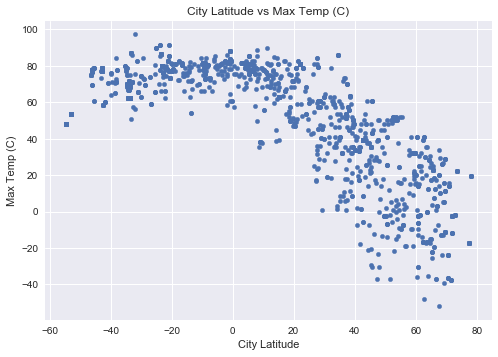

In [42]:
plt.style.use('seaborn')
cities_pd.plot.scatter('Lat', 'Max Temp', grid=True, title='City Latitude vs Max Temp (C)')
plt.ylabel("Max Temp (C)")
plt.xlabel('City Latitude')
plt.show()

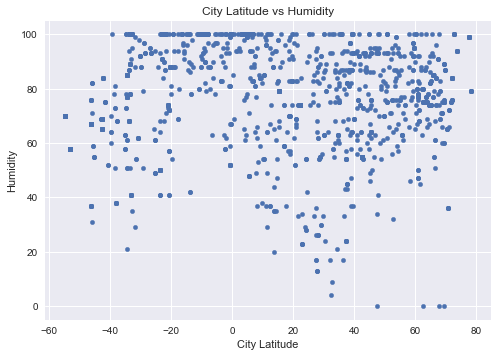

In [43]:
plt.style.use('seaborn')
cities_pd.plot.scatter('Lat', 'Humidity', grid=True, title='City Latitude vs Humidity')
plt.ylabel("Humidity (%)")
plt.xlabel('City Latitude')
plt.show()

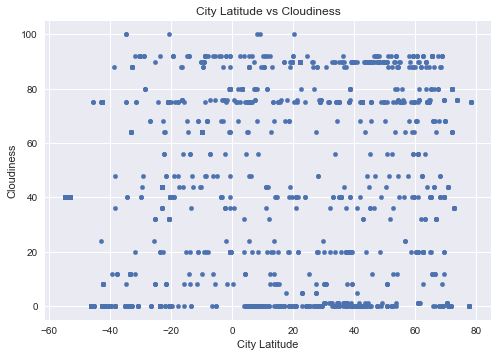

In [44]:
plt.style.use('seaborn')
cities_pd.plot.scatter('Lat', 'Cloudiness', grid=True, title='City Latitude vs Cloudiness')
plt.ylabel("Cloudiness (%)")
plt.xlabel('City Latitude')
plt.show()

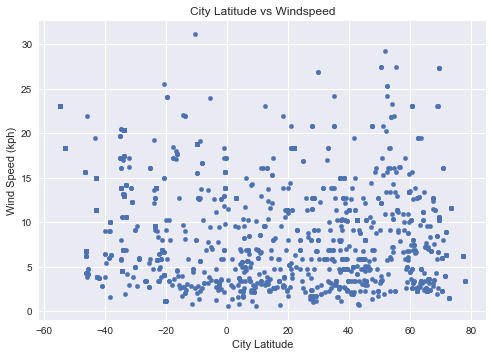

In [46]:
plt.style.use('seaborn')
cities_pd.plot.scatter('Lat', 'Wind Speed', grid=True, title='City Latitude vs Windspeed')
plt.ylabel("Wind Speed (kph)")
plt.xlabel('City Latitude')
plt.show()